# Chapter 6: Machine Learning -------- Part A

    6 | Overview
        6.1 What is Machine Learning?
        6.2 Scikit-Learn
        6.3 Supervised Learning: Classification
        6.4 Supervised Learning: Regression
        6.5 Unsupervised Learning: Dimension Reduction
        6.6 Unsupervised Learning: Clustering

## Part A will be about 6.1 and 6.2 

### 6.1 is explained in the lecture video and my notes will continue from 6.2: Scikit-Learn


### Most of the video lectures of part A was to explain what is a "Machine Learning" and how many parts does it have? What kind of tools and methods are we going to use in this chapter and what are the essentials of Scikit-learn in this context is also explained in the video. 



# Scikit-Learn

## Data Representation in Scikit-Learn 
    Features matrix
    ▪ information (data) usually as a two-dimensional numerical array or matrix 
        → this is called the features matrix
        → often stored in a variable named X
    ▪ features matrix is assumed to be two-dimensional, with shape [n_samples, n_features]
        → most often contained in NumPy array or Pandas DataFrame
    ▪ samples (i. e., rows) always refer to the individual objects described by the dataset
    
    Target array
    ▪ outcome variable / label is called target array 
        → by convention named y
    ▪ target array is usually one dimensional, with length n_samples
    
    
## Scikit-Learn’s Estimator API 

    The Estimator API

    ▪ every machine learning algorithm in Scikit-Learn is implemented via the Estimator API 
    ▪ provides a consistent interface for a wide range of machine learning applications
    
    Basics of the Estimator API
    
    1 choose model class by importing the appropriate estimator class from Scikit-Learn
    2 choose model hyperparameters (instantiate class with desired values)
    3 arrange data into a features matrix and target vector
    4 fit the model to your data by calling the .fit() method of the model instance
    5 apply the model to new data
        → supervised learning: predict labels for unknown data using .predict()
        → unsupervised learning: transform or infer properties of the data using .transform() or
          .predict()
          

## Example: Simple linear regression (Supervised Learning) 

    Simple linear regression example: Data
    

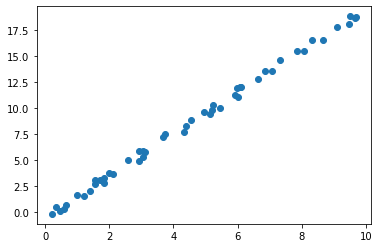

In [7]:
# Simple linear regression example: data

import matplotlib.pyplot as plt 
import numpy as np 
rng = np.random.RandomState(42)

# generate some data

x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)

plt.scatter(x,y);

### Choose a class of model: Linear Regression

In [9]:
# 'LinearRegression' is a class of 'linear_model'

from sklearn.linear_model import LinearRegression

### Choose model hyperparameters

    ▪ a class of a model is not the same as an instance of a model!
    ▪ several choices once the model class is selected (often represented as hyperparameters),
      here:
        → Would we like to fit for the offset (i.e., intercept)?
        → Would we like the model to be normalized?
        → Would we like to preprocess our features to add model flexibility? 
        → What degree of regularization would we like to use in our model? 
        → How many model components would we  like to use?


In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Arrange data into features matrix and target vector

In [11]:
y.shape

(50,)

In [12]:
x.shape

(50,)

In [13]:
X = x[:, np.newaxis] # add a new axis that shape must be two-dimensional
X.shape

(50, 1)

### Fit the model to your data

In [14]:
model.fit(X,y)    # X is the features, y is the outcome variable

LinearRegression()

        → all model parameters that were learned during .fit() have trailing underscores

In [15]:
# as an example, extract regression coefficient and the intercept:

model.coef_

array([2.00660766])

In [16]:
 model.intercept_

-0.5350275750800026

## Predict labels for unknown data:

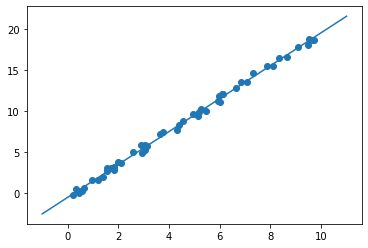

In [19]:
# generate 'new data':
xfit = np.linspace(-1, 11)

# transform data:
Xfit = xfit[:, np.newaxis]

# predict outcome
yfit = model.predict(Xfit)

# see some results
yfit[:10]

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show();

### Toy example is done here. 

## Great example: Penguin calssification

In [1]:
import pandas as pd

# palmer penguins dataset

penguins = pd.read_csv('/Users/abdulhabirkarahanli/Desktop/Data/penguins.csv')

# species: turler. bill_length:gaga uzunlugu. flipper_length: kanat/kol uzunlugu
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Our goal in this example is to predict the penguin species based on the data we have in our dataset. So we want to have a machine learning model that based on some measurements of a penguin can predict which kind of penguin we have.

### How can we do that? We will cover it step by step:

#### 1. Step: Data preprocessing
    ▪ fill missing values with mean value of variable 
    ▪ convert categorical data into dummy variables 
    ▪ split data into features and target

In [2]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
# fill missing values with mean 
penguins = penguins.fillna(penguins.mean())
penguins
# covert categorical data into dummy variables



## From this part now on, a problem arises about getting dummy variables... 

# So I will leave it as it is

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [32]:
### Penguins example is NOT successfully finished!!!

### Missing Data

    Data imputation with missing data
    ▪ for a baseline imputation approach (i. e., using the mean, median, or most frequent value), Scikit-Learn provides the SimpleImputer class
    ▪ for Pandas DataFrames, you can also use the .fillna() method


In [31]:
# Some data with missing values: 

X = np.array([[np.nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, np.nan, 6],
             [8, 8, 1]])
X

# impute missing values with mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')       # or e.g., 'most_frequent' is also another option

# apply the transformation

X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### 'Done'   ?